<a href="https://colab.research.google.com/github/jagvgithub/Python_para_IA/blob/main/Modelo_propension_python_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Internacional de Valencia
## Python para la inteligencia artificial
### Jose Antonio Gómez Vargas
### Proyecto
#### Mayo - 2024

ClasificaPrep: Preparando el Terreno para un Modelo Preciso
---

En el sector financiero, la venta cruzada es una estrategia crucial que implica ofrecer productos adicionales o complementarios a los clientes existentes. Esto puede incluir la oferta de servicios financieros como cuentas de ahorro, tarjetas de crédito, préstamos, seguros u otros productos relacionados.

La importancia de la venta cruzada en el sector financiero radica en varios factores:

* Incremento de ingresos: La venta cruzada permite a las instituciones financieras aumentar sus ingresos al ofrecer productos adicionales a los clientes existentes. En lugar de depender únicamente de un producto, como una cuenta de ahorros, las instituciones pueden diversificar sus fuentes de ingresos vendiendo una gama más amplia de productos y servicios.

* Mejora de la retención de clientes: Al ofrecer una amplia gama de productos financieros y satisfacer múltiples necesidades de los clientes, las instituciones financieras pueden aumentar la retención de clientes. Los clientes que tienen múltiples productos con una institución son más propensos a permanecer leales y menos propensos a cambiarse a la competencia.

* Aumento del valor de vida del cliente: La venta cruzada puede aumentar el valor de vida del cliente, es decir, el valor total que un cliente aporta a una institución financiera a lo largo de su relación. Al ofrecer productos adicionales, las instituciones pueden aumentar los ingresos generados por cada cliente a lo largo del tiempo.

* Personalización y mejora de la experiencia del cliente: La venta cruzada bien ejecutada puede mejorar la experiencia del cliente al ofrecer productos y servicios que satisfacen sus necesidades específicas. Esto puede fortalecer la relación entre el cliente y la institución financiera al demostrar un entendimiento profundo de las necesidades financieras del cliente.

* Optimización de la eficiencia operativa: Al vender múltiples productos a los clientes existentes, las instituciones financieras pueden optimizar sus operaciones al consolidar la gestión de la relación con el cliente y reducir los costos asociados con la adquisición de nuevos clientes.

En resumen, la venta cruzada en el sector financiero es crucial para impulsar el crecimiento, mejorar la retención de clientes, aumentar el valor de vida del cliente y mejorar la experiencia general del cliente. Sin embargo, es importante que esta estrategia se implemente de manera ética y centrada en el cliente, garantizando que los productos adicionales ofrecidos sean realmente beneficiosos y adecuados para las necesidades individuales de cada cliente.


En el ámbito del sector financiero, se ha diseñado un riguroso proceso de Extracción, Transformación y Carga (ETL) de datos sobre una tabla de clientes anonimizada. Este enfoque asegura la confidencialidad de la información sensible del cliente mientras se aprovechan los datos para la creación de un modelo de propensión.



---
# Cargue de información que alimentará el modelo que se evaluará posteriormente
---


In [ ]:
# Paquetes necesarios
!pip install pycaret # Modelos ML
!pip install gender_guesser # Estimación de género
# Librerias necearias
from google.colab import files  # Carga de datos
import pandas as pd # Manipulación de bases de datos
import numpy as np # Manipulación de bases de datos
import matplotlib.pyplot as plt # Visualizaciones
import keyword # Listado de palabras reservadas
from wordcloud import WordCloud # Nube de palabras
import gender_guesser.detector as gender # Estimación de género a partir del primer y segundo nombre


In [ ]:
uploaded = files.upload() # Carga de información desde el equipo local

Saving ModeloPropension.xlsx to ModeloPropension.xlsx


In [ ]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/ModeloPropension.xlsx'  # Asegúrate de que la ruta sea correcta según la ubicación del archivo cargado

# Leer el archivo xlsx usando pandas
datos = pd.DataFrame(pd.read_excel(ruta_archivo))

# Mostrar los primeros 5 registros para verificar que se haya cargado correctamente
print(datos[['Origen Nacional','MontoIngresos','Egresos']].head())

# creación de campos constantes
datos['TipoPersona'],datos['Escliente'],datos['Llave']  = 'Natural','1',dict(zip(datos['name1'],datos['Genero']))

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


  Origen Nacional  MontoIngresos    Egresos
0        COLOMBIA      2459000.0        0.0
1        COLOMBIA      1300000.0   312000.0
2        COLOMBIA       800000.0        NaN
3        COLOMBIA      1000000.0  5005000.0
4        COLOMBIA      1320000.0        NaN


---
# ! Cuidado con las palabras reservadas !
---

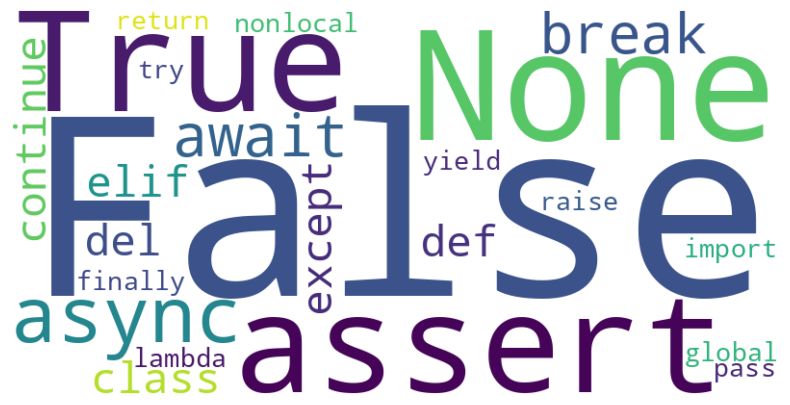

In [ ]:
# Obtener la lista de palabras reservadas
palabras_reservadas = keyword.kwlist

# Convertir la lista de palabras reservadas a una cadena
texto = ' '.join(palabras_reservadas)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
''' imprimir los difrentes formatos de datos que contiene la tabla de clientes '''
print(datos.dtypes.unique())
# determinar las dimensiones que posee el df
print(datos.shape)

[dtype('int64') dtype('float64') dtype('O')]
(246036, 46)


---
# Análisis de datos faltantes
---

In [ ]:
# proporción de datos faltantes para cada columna
proporcion_datos_faltantes = round(datos.isnull().sum() / len(datos),2) * 100
print(proporcion_datos_faltantes)

DocumentoCliente                      0.0
MontoIngresos                         0.0
Egresos                              14.0
Pasivos                               9.0
Origen Nacional                       0.0
Departamento                          0.0
Municipio                             1.0
CodigoCIIU                            0.0
MontoEntradasLarga                    0.0
CantidadEntradasLarga                 0.0
MontoSalidasLarga                     0.0
CantidadSalidasLarga                  0.0
MontoEntradasCorta                    0.0
CantidadEntradasCorta                 0.0
MontoSalidasCorta                     0.0
CantidadSalidasCorta                  0.0
VulnerabilidadLavadoActivos           2.0
VulnerabilidadTerrorismo              2.0
DOCUMENTACION FALSA EN RADICACION     0.0
DOCUMENTACION FALSA INCOCREDITO       0.0
ValidacionFraudes                     0.0
pep                                   0.0
extranjero                            0.0
Incomercio                        

* Función para estimar el género del cliente y así poder incluir esta variable dentro del modelo.

* Se puede incluir una estrategia de mercado de acuerdo al género del cliente, razón por la cual la variable Genero es fundamental para la construcción del modelo.

In [ ]:
# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Aplicar la función a las dos columnas
datos['Genero_estimado_1'] = estimar_genero_por_bloques(datos['name1'])
datos['Genero_estimado_2'] = estimar_genero_por_bloques(datos['name2'])

datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))

datos[col for col in datos.columns if 'Genero' in col ].value_counts()
datos['Genero'].value_counts()

Genero
Masculino    155488
Femenino      90548
Name: count, dtype: int64

* Función para estimar el género del cliente y así poder incluir esta variable dentro del modelo.

* Se puede incluir una estrategia de mercado de acuerdo al género del cliente, razón por la cual la variable Genero es fundamental para la construcción del modelo.

---
# Imputación de datos faltantes
---

* Por practicidad del ejericio para las columna de tipo numérico para los valores faltantes se tomará la media de la población total.
* En el caso de los campos con fromato string se tomará la moda del campo.
* el campo "Retiro en oficina" al tener una proporción de datos faltantes arriba del 90 % no tiene sentido aplicarle el proceso de imputación, razón por la cual es necesario excluir del estudio esta columna (a menos que por criterio experto se deba mantener el campo).

In [ ]:
# Rellenar valores faltantes en columnas numéricas con la media de la población total
columnas_numericas = datos.select_dtypes(include='number').columns.drop('Acierta_Master')

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    datos[columna] = datos[columna].fillna(datos[columna].mean())

# Rellenar valores faltantes en columnas de tipo string con la moda del campo
for columna in datos.select_dtypes(include='object').columns:
    datos[columna] = datos[columna].fillna(datos[columna].mode()[0])

In [ ]:
# proporción de datos faltantes para cada columna
proporcion_datos_faltantes = round(datos.isnull().sum() / len(datos),2) * 100
print(proporcion_datos_faltantes)

DocumentoCliente                      0.0
MontoIngresos                         0.0
Egresos                               0.0
Pasivos                               0.0
Origen Nacional                       0.0
Departamento                          0.0
Municipio                             0.0
CodigoCIIU                            0.0
MontoEntradasLarga                    0.0
CantidadEntradasLarga                 0.0
MontoSalidasLarga                     0.0
CantidadSalidasLarga                  0.0
MontoEntradasCorta                    0.0
CantidadEntradasCorta                 0.0
MontoSalidasCorta                     0.0
CantidadSalidasCorta                  0.0
VulnerabilidadLavadoActivos           0.0
VulnerabilidadTerrorismo              0.0
DOCUMENTACION FALSA EN RADICACION     0.0
DOCUMENTACION FALSA INCOCREDITO       0.0
ValidacionFraudes                     0.0
pep                                   0.0
extranjero                            0.0
Incomercio                        

In [ ]:
datos = datos.drop(columns={'Retiro en oficina','TipoPersona','Escliente','Llave'})
print(datos.shape)

(246036, 47)


In [ ]:
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.hist(datos['Acierta_Master'], bins=20, color='skyblue', edgecolor='black')  # Histograma con 20 contenedores, color de cielo azul y bordes negros
plt.title('Histograma de la columna score')  # Título del histograma
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.grid(True)  # Habilitar cuadrícula
plt.show()

---
# Criterio de selección
---

Para la entidad financiera aquellos clientes con un Acierta_Master <= 680 deben ser descartados debido a que puede que no tengan un comportamiento de pagos adecuado y pueden afectar el indicador de cartera en mora.


In [ ]:
while True:
    try:
        acierta = int(input('Ingrese el valor de Acierta hasta que un cliente quede descartado: '))
        break  # Rompe el bucle si la entrada es válida
    except ValueError:
        print("Error: Debe ingresar un valor numérico. Por favor, inténtelo de nuevo.")

# El valor de 'acierta' es un entero en este punto
print("El valor de 'acierta' es:", acierta)
datos = datos[datos['Acierta_Master']> acierta]
print(datos.shape)

Ingrese el valor de Acierta hasta que un cliente quede descartado: a
Error: Debe ingresar un valor numérico. Por favor, inténtelo de nuevo.
Ingrese el valor de Acierta hasta que un cliente quede descartado: jose
Error: Debe ingresar un valor numérico. Por favor, inténtelo de nuevo.
Ingrese el valor de Acierta hasta que un cliente quede descartado: 690
El valor de 'acierta' es: 690
(107673, 47)


In [ ]:
# Ajuste de formato a string
datos['DocumentoCliente'] = datos['DocumentoCliente'].apply(lambda x: '{:.0f}'.format(x)).astype(str).str.strip()

---
# Limpieza de datos
---

In [ ]:
datos = datos.drop(columns={'name1','name2','Genero_estimado_1','Genero_estimado_2'})
print(datos.shape)

(107673, 43)


---
# Construcción del modelo
---
* Entrenamiento y testeo

In [ ]:
# Crear un índice para el DataFrame original
datos = datos.reset_index(drop=True)

# Dividir la base de datos en entrenamiento y prueba
data = datos.sample(frac=0.75, random_state=786).reset_index(drop=True)  # conjunto de entrenamiento
data_testeo = datos.drop(data.index).reset_index(drop=True)  # conjunto de prueba

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", data.shape,"Dimensiones del conjunto de prueba:", data_testeo.shape)

Dimensiones del conjunto de entrenamiento: (80755, 43) Dimensiones del conjunto de prueba: (26918, 43)


In [ ]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
exp_clf101 = setup(data=data,target='Aperturo_2_productos',session_id=10001)  # variable  de interés

,Description,Value
0,Session id,10001
1,Target,Aperturo_2_productos
2,Target type,Binary
3,Original data shape,"(80755, 43)"
4,Transformed data shape,"(80755, 54)"
5,Transformed train set shape,"(56528, 54)"
6,Transformed test set shape,"(24227, 54)"
7,Numeric features,36
8,Categorical features,6
9,Preprocess,True


---
# Validación cruzada
---

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6394,0.6918,1.0000,0.6350,0.7768,0.0405,0.1435,1.0820
et,Extra Trees Classifier,0.6390,0.5627,0.9957,0.6355,0.7758,0.0425,0.1374,3.1300
dt,Decision Tree Classifier,0.6273,0.5000,1.0000,0.6273,0.7710,0.0000,0.0000,0.8720
ridge,Ridge Classifier,0.6273,0.7244,1.0000,0.6273,0.7710,0.0000,0.0000,1.0910
rf,Random Forest Classifier,0.6273,0.6981,1.0000,0.6273,0.7710,0.0001,0.0017,7.4940
ada,Ada Boost Classifier,0.6273,0.5000,1.0000,0.6273,0.7710,0.0000,0.0000,1.6000
gbc,Gradient Boosting Classifier,0.6273,0.4995,1.0000,0.6273,0.7710,0.0000,0.0000,10.7360
lda,Linear Discriminant Analysis,0.6273,0.5000,1.0000,0.6273,0.7710,0.0000,0.0000,1.2400
lightgbm,Light Gradient Boosting Machine,0.6273,0.5000,1.0000,0.6273,0.7710,0.0000,0.0000,3.1000
dummy,Dummy Classifier,0.6273,0.5000,1.0000,0.6273,0.7710,0.0000,0.0000,1.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
modelo = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6413,0.7309,1.0000,0.6362,0.7776,0.0466,0.1544
1,0.6398,0.7289,1.0000,0.6353,0.7770,0.0419,0.1463
2,0.6382,0.6986,1.0000,0.6342,0.7762,0.0366,0.1366
3,0.6372,0.6846,1.0000,0.6336,0.7757,0.0331,0.1298
4,0.6420,0.7306,1.0000,0.6366,0.7780,0.0489,0.1584
5,0.6391,0.6757,1.0000,0.6348,0.7766,0.0396,0.1421
6,0.6391,0.5469,1.0000,0.6348,0.7766,0.0396,0.1421
7,0.6388,0.6778,1.0000,0.6346,0.7764,0.0384,0.1399
8,0.6391,0.7251,1.0000,0.6348,0.7766,0.0390,0.1410


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6255,0.6596,0.6461,0.7266,0.6840,0.2283,0.2307
1,0.6285,0.6630,0.6554,0.7258,0.6888,0.2310,0.2329
2,0.6152,0.6496,0.6218,0.7256,0.6697,0.2155,0.2192
3,0.6161,0.6555,0.6122,0.7320,0.6668,0.2225,0.2275
4,0.6301,0.6737,0.6348,0.7388,0.6828,0.2452,0.2493
5,0.6329,0.6644,0.6619,0.7282,0.6935,0.2387,0.2404
6,0.6200,0.6626,0.6241,0.7308,0.6733,0.2260,0.2300
7,0.5961,0.6341,0.6120,0.7052,0.6553,0.1736,0.1762
8,0.6162,0.6559,0.6134,0.7316,0.6673,0.2222,0.2270


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
help(plot_model) # Validacion visual

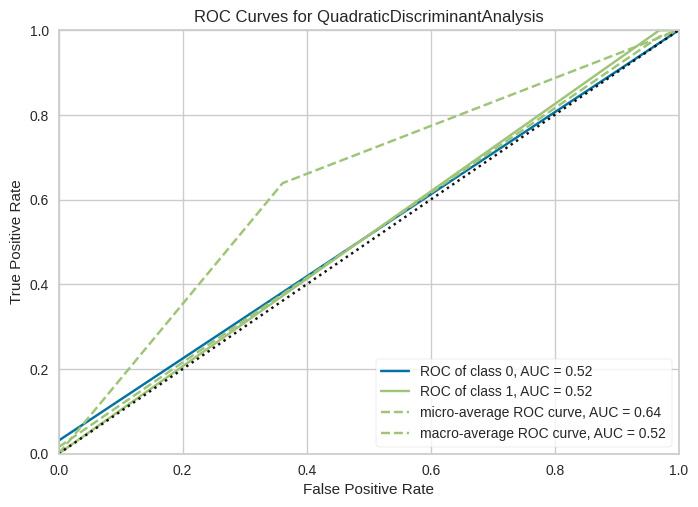

In [ ]:
plot_model(tuned_modelo,plot='auc')


In [ ]:
## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

In [ ]:
# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')

In [ ]:
# Validation Curve
plot_model(tuned_modelo, plot = 'vc')

In [ ]:
predicciones = predict_model(tuned_modelo,data=data_testeo)
predicciones[['Aperturo_2_productos','prediction_label','prediction_score']].head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8381,0.7725,1.0000,0.7991,0.8883,0.6068,0.6600


,Aperturo_2_productos,prediction_label,prediction_score
0,1,1,1.0
1,1,1,1.0
2,1,1,1.0
3,1,1,1.0
4,0,0,1.0


In [ ]:
# modelo final entrenado con todo el conjunto de datos
final_modelo=finalize_model(tuned_modelo)

In [ ]:
save_model(final_modelo,'ModeloPropension_producto2')